##  Classification + Regression 

Generally, CNN is used to classify one object in an image, but with advancement in the different CNN models like RNN, Fast RCNN etc. where we can localize multiple objects in the image and classify it. There are many applications where we might want to locate an object rather than just classifying the image. for instance, in self driving car, the model needs to find the location of person or signal etc.

So, finding the location of the object in a frame is done by Localization. Similar to Novel CNN, the model is trained on image, which contains both the object and a bounding box around it i.e. the coordinates of the bounding boxes is  passed. When a model is trained on such images, the model creates feature map/vector and these feature maps are separately taken and feed into two different full connected layer, one for classification of object and other is find the bounding box.

Note: These models are combination of classification and Regression. To Classify object, we use normal cnn with cross entropy loss is used, but when it comes to finding bounding box, the regressor model has to estimate the distance between two points or coordinates i.e. a quantity is measured, where L1 loss, MSE, Smooth L1 Loss is used to find the error between the predicted and actual bounding box.

### Weighted Loss Functions

How can we train a network with two different outputs (a class and a bounding box) and different losses for those outputs?

We know that, in this case, we use categorical cross entropy to calculate the loss for our predicted and true classes, and we use a regression loss (something like smooth L1 loss) to compare predicted and true bounding boxes. But, we have to train our whole network using one loss, so how can we combine these?

There are a couple of ways to train on multiple loss functions, and in practice, we often use a weighted sum of classification and regression losses (ex. 0.5*cross_entropy_loss + 0.5*L1_loss); the result is a single error value with which we can do backpropagation. This does introduce a hyperparameter: the loss weights. We want to weight each loss so that these losses are balanced and combined effectively, and in research we see that another regularization term is often introduced to help decide on the weight values that best combine these losses.

https://pytorch.org/docs/stable/nn.html#mseloss

https://pytorch.org/docs/stable/nn.html#smoothl1loss

Distracted Driver Detection

https://github.com/tdeboissiere/VGG16CAM-keras/blob/master/VGGCAM-keras.py

### Identifying Multiple Objects

Basic strategy to identify the multiple object is to create a region of interest by passing a sliding window over the image and crop the region from image, then pass the cropped region into cnn for bounding box and classification. Its a time consuming process because the majority of the cropped region will not contain the desired object.

In [3]:
from IPython.display import Image

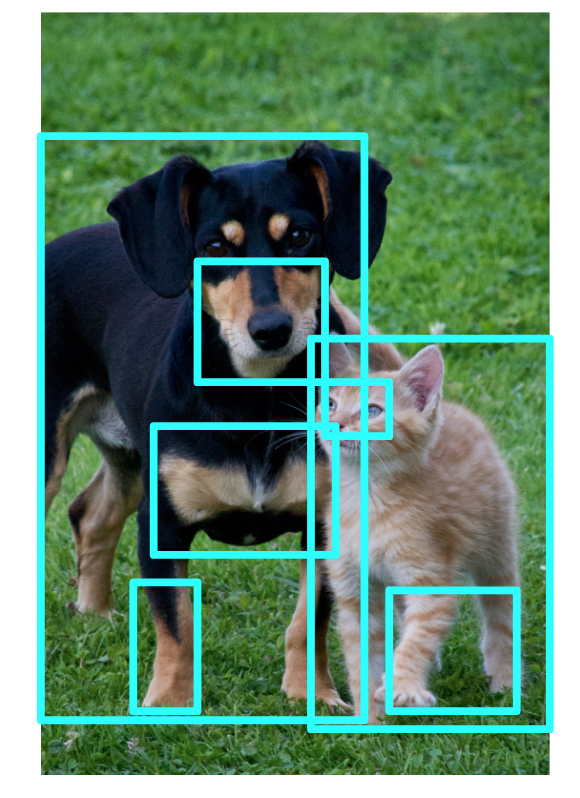

In [4]:
Image(filename='/Users/mayurjain/Desktop/cv_images/multipleObjects.png')

## RCNN - Region Convolutional Neural Network

The input image is passed through a Region Proposal Algorithm, which generates bounding boxes over all the possible objects in an image based on edge detection and texture bobs. After bounding boxes are generated, each region is passed through a classification based CNN model to find the classify the object. It is extremely time intensive as all the region will pass through the CNN network.



### NOTES:
R-CNN Outputs

The R-CNN is the least sophisticated region-based architecture, but it is the basis for understanding how multiple object recognition algorithms work! It outputs a class score and bounding box coordinates for every input RoI.

An R-CNN feeds an image into a CNN with regions of interest (RoI’s) already identified. Since these RoI’s are of varying sizes, they often need to be warped to be a standard size, since CNN’s typically expect a consistent, square image size as input. After RoI's are warped, the R-CNN architecture, processes these regions one by one and, for each image, produces 1. a class label and 2. a bounding box (that may act as a slight correction to the input region).

R-CNN produces bounding box coordinates to reduce localization errors; so a region comes in, but it may not perfectly surround a given object and the output coordinates (x,y,w,h) aim to perfectly localize an object in a given region.
R-CNN, unlike other models, does not explicitly produce a confidence score that indicates whether an object is in a region, instead it cleverly produces a set of class scores for which one class is "background". This ends up serving a similar purpose, for example, if the class score for a region is Pbackground = 0.10, it likely contains an object, but if it's Pbackground = 0.90, then the region probably doesn't contain an object.

## Fast RCNN 

ROI -- Region of Interest, each object is of different sizes and shapes, so each ROI will be of different sizes.

In RCNN, we crop the ROI generated by region proposal algorithm from the original image and treat that region as image, but in Fast RCNN, the different proposed ROI is mapped on feature maps and each is passed to ROI pooling layer one after another to get a standard size for further analysis by other layers.

### RoI Pooling

To warp regions of interest into a consistent size for further analysis, some networks use RoI pooling. RoI pooling is an additional layer in our network that takes in a rectangular region of any size, performs a maxpooling operation on that region in pieces such that the output is a fixed shape. Below is an example of a region with some pixel values being broken up into pieces which pooling will be applied to; a section with the values:

[[0.85, 0.34, 0.76],
 [0.32, 0.74, 0.21]]
 
Will become a single max value after pooling: 0.85. After applying this to an image in these pieces, you can see how any rectangular region can be forced into a smaller, square representation.



https://blog.deepsense.ai/region-of-interest-pooling-explained/

### Speed

Fast R-CNN is about 10 times as fast to train as an R-CNN because it only creates convolutional layers once for a given image and then performs further analysis on the layer. Fast R-CNN also takes a shorter time to test on a new image! It’s test time is dominated by the time it takes to create region proposals.



## Faster R-CNN

When it comes to speed factor, the Fast R-CNN fails on testing images. Because the network still needs to find the Region Proposal which consumes time and each of the proposal is extarctec from feature maps and passed into cnn. 

To overcome this problem, Faster R-CNN is introduced. Faster R-CNN uses Region Proposal Network, which predicts region from feature maps and applies a binary classification in the same network, to identify if the region has object or not. If object is found then that region is passed on to the other layer for classification and Bounding Box generation.


https://github.com/jwyang/faster-rcnn.pytorch

### Region Proposal Network

How exactly are the RoI's generated in the region proposal portion of the Faster R-CNN architecture?

The RPN looks at the output of the last convolutional layer, a produced feature map, and takes a sliding window approach to possible-object detection. It slides a small (typically 3x3) window over the feature map, then for each window the RPN:

Uses a set of defined anchor boxes, which are boxes of a defined aspect ratio (wide and short or tall and thin, for example) to generate multiple possible RoI's, each of these is considered a region proposal.
For each proposal, this network produces a probability, Pc, that classifies the region as an object (or not) and a set of bounding box coordinates for that object.
Regions with too low a probability of being an object, say Pc < 0.5, are discarded.
Training the Region Proposal Network
Since, in this case, there are no ground truth regions, how do you train the region proposal network?

The idea is, for any region, you can check to see if it overlaps with any of the ground truth objects. That is, for a region, if we classify that region as an object or not-object, which class will it fall into? For a region proposal that does cover some portion of an object, we should say that there is a high probability that this region has an object init and that region should be kept; if the likelihood of an object being in a region is too low, that region should be discarded.

https://towardsdatascience.com/deep-learning-for-object-detection-a-comprehensive-review-73930816d8d9